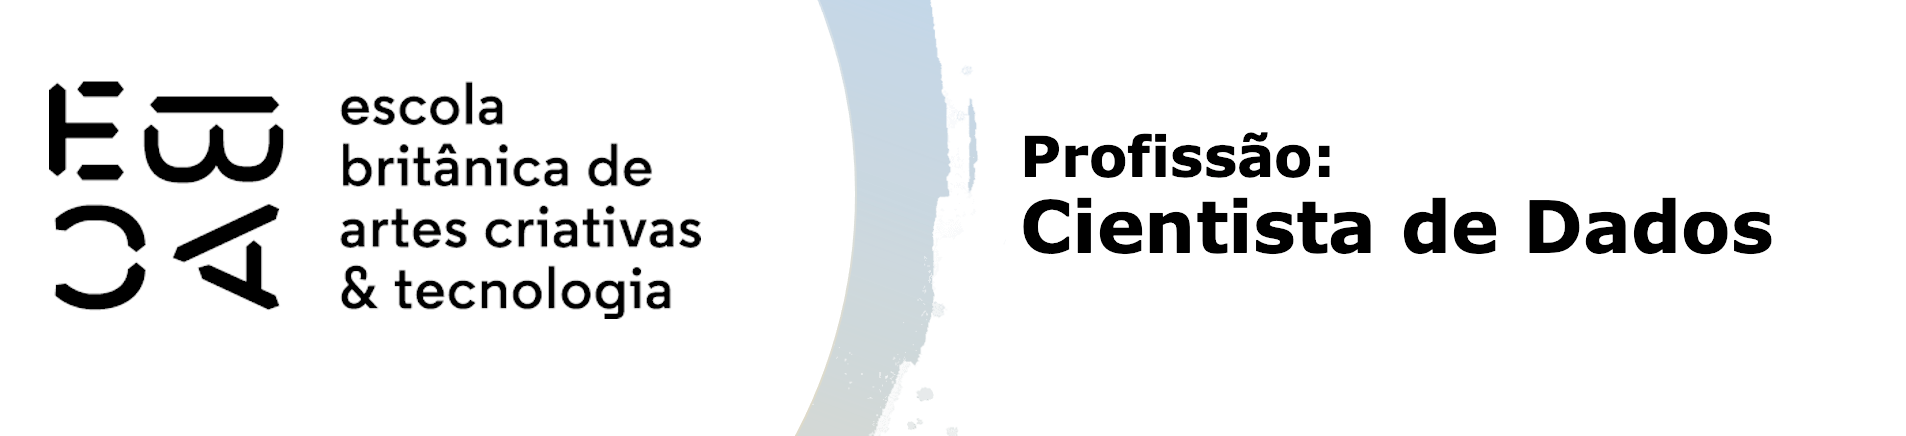

# Métodos hierárquicos de agrupamento

## Tipos de ligação

O tipo de ligação é a forma como vamos conectar um elemento a um conjunto de pontos já agrupados. Este elemento pode ser um ponto ou outro agrupamento de pontos. Há várias formas de se definir este critério, vamos discutir algumas e suas características.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

from sklearn.cluster import KMeans

## Parâmetros do algoritmo - Tipos de ligação

| | |
|:-:|:-:|
|***Single linkage*** (ligação simples): a distância de um ponto ao cluster é o mínimo entre todas as distâncias do ponto a cada ponto do grupo.| ***Complete linkage*** (ligação completa): A distância de um ponto ao cluste é o máximo entre todas as distâncias do ponto a cada ponto do grupo. |
|<div><img src="attachment/4-image.png" width="200"/></div> | <div><img src="attachment/4-image-2.png" width="200"/></div>|
|***Average linkage*** (Ligação média): A distância de um ponto ao cluster é a média entre todas as distâncias do ponto ao grupo | ***Ward linkage*** (ligação Ward): Esse método se baseia na soma de quadrados das distâncias (SQD) de cada ponto ao centróide do seu respectivo grupo. A distância entre dois clusters se define como o aumento na SQD se juntarmos esses dois grupos.|
|<div><img src="attachment/4-image-3.png" width="250"/></div>|<div><img src="attachment/4-image-7.png" width="450"/></div> |


<!-- 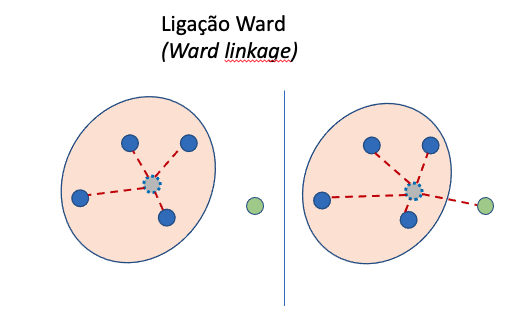 -->
<!-- ![image-4.png](attachment:image-4.png) -->

## Dados sintéticos

https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-hierarchical-clustering

In [2]:
from sklearn import datasets
import numpy as np

In [3]:
X1, Y1 = datasets.make_moons(n_samples=400,
                  noise=0.05,
                  random_state=2360873)

X2, Y2  = datasets.make_circles(n_samples=390, noise=0.01,factor=0.5)

X3, Y3 = datasets.make_blobs(n_samples=380, random_state=12345)

X4, Y4 = datasets.make_blobs(n_samples=450, random_state=12345)
X4 = np.dot(X4, [[1, 2], [2, 2]])

X = [X1, X2, X3, X4]
Y = [Y1, Y2, Y3, Y4]

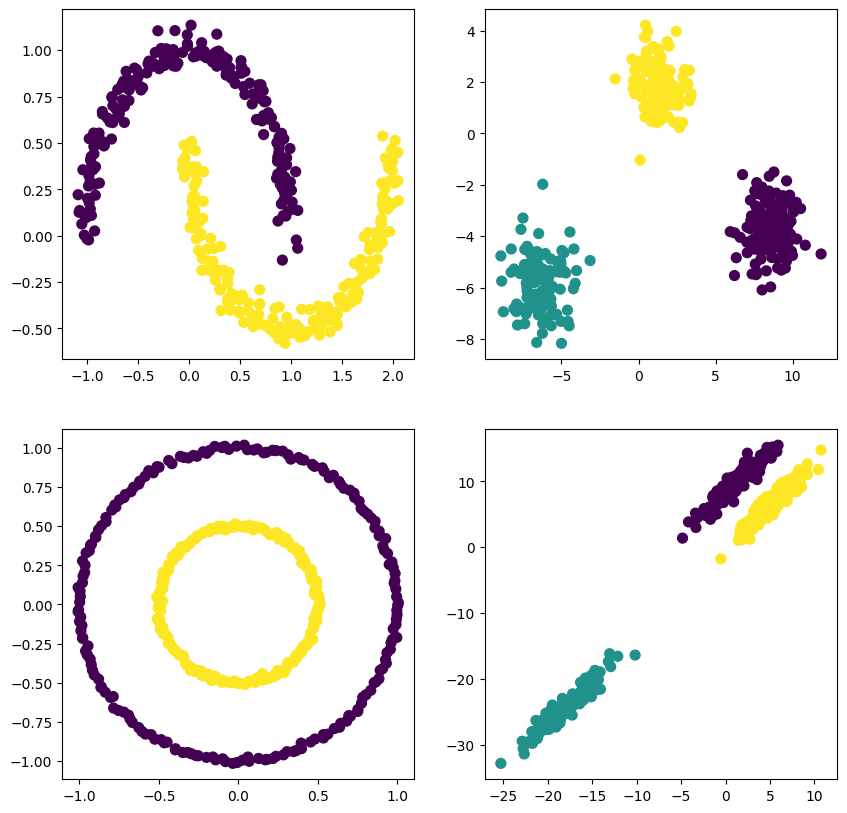

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

for i in range(4):
    ax[i%2,i//2].scatter(X[i][:,0],X[i][:,1], c = Y[i], marker="o", s=50);
# ax[0,0].set_title("Original Data");

In [5]:
ls = []
lc = []
lm = []
wd = []
km = []

mt = [ls, lc, lm, wd, km]
metodos = ['single', 'complete', 'average', 'ward', 'k-means']

for i in range(4):
    for j in range(4):
        mt[j].append(AgglomerativeClustering(n_clusters=len(np.unique(Y[i])), linkage=metodos[j]).fit(X[i]))

for i in range(4):
    mt[4].append(KMeans(n_clusters=len(np.unique(Y[i]))).fit(X[i]))
    


In [6]:
mt

[[AgglomerativeClustering(linkage='single'),
  AgglomerativeClustering(linkage='single'),
  AgglomerativeClustering(linkage='single', n_clusters=3),
  AgglomerativeClustering(linkage='single', n_clusters=3)],
 [AgglomerativeClustering(linkage='complete'),
  AgglomerativeClustering(linkage='complete'),
  AgglomerativeClustering(linkage='complete', n_clusters=3),
  AgglomerativeClustering(linkage='complete', n_clusters=3)],
 [AgglomerativeClustering(linkage='average'),
  AgglomerativeClustering(linkage='average'),
  AgglomerativeClustering(linkage='average', n_clusters=3),
  AgglomerativeClustering(linkage='average', n_clusters=3)],
 [AgglomerativeClustering(),
  AgglomerativeClustering(),
  AgglomerativeClustering(n_clusters=3),
  AgglomerativeClustering(n_clusters=3)],
 [KMeans(n_clusters=2),
  KMeans(n_clusters=2),
  KMeans(n_clusters=3),
  KMeans(n_clusters=3)]]

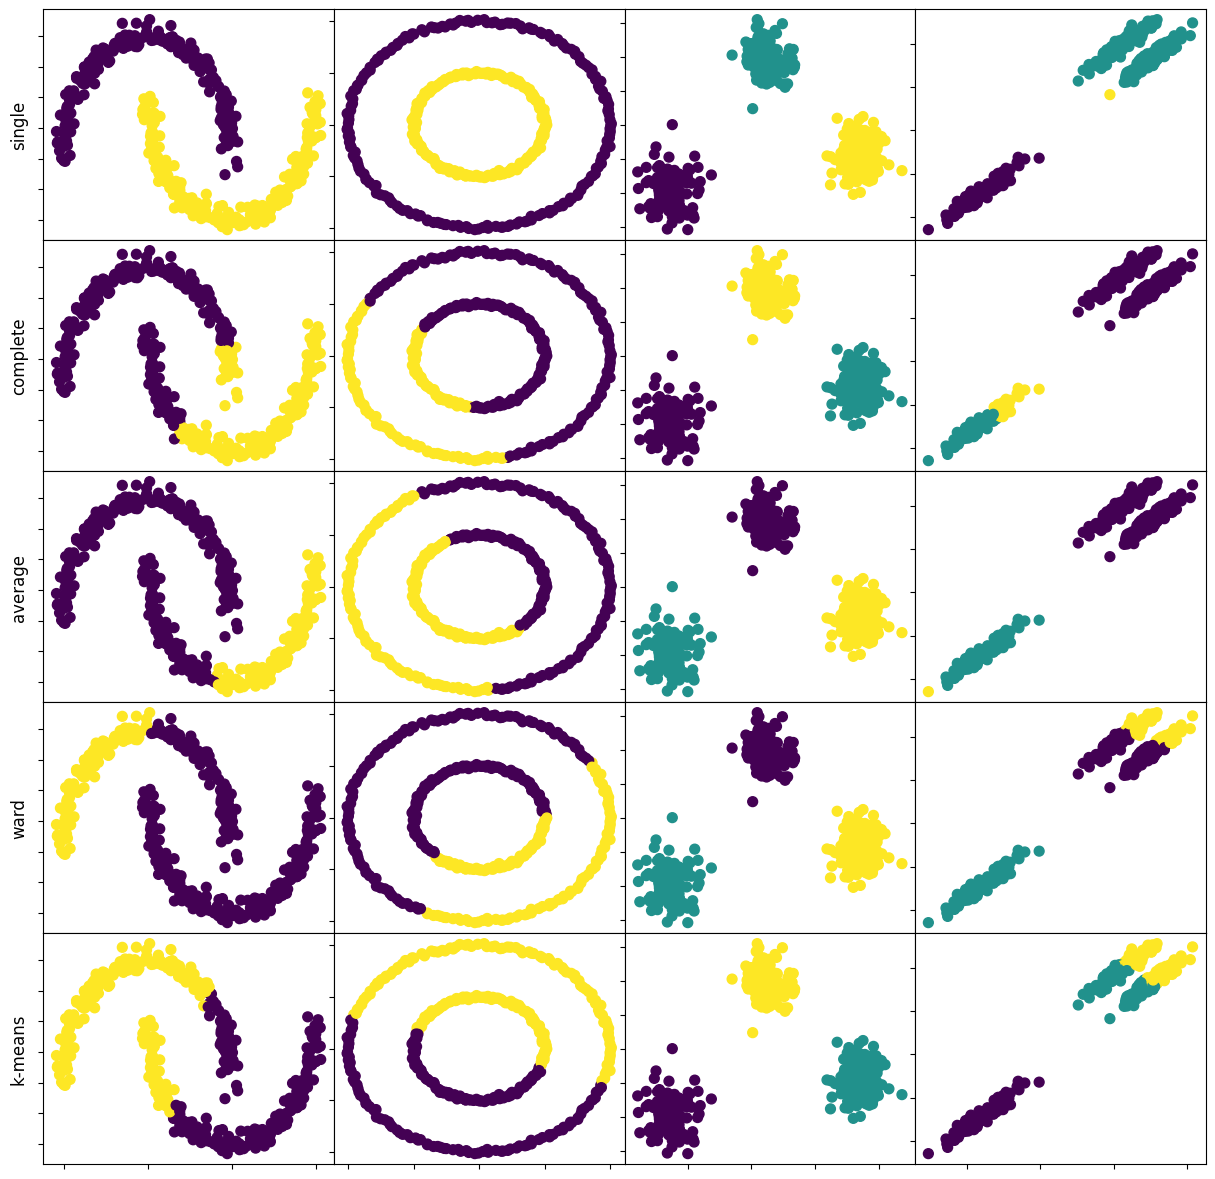

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(15,15))

for i in range(4):

    # Desativar rótulos dos eixos
    for j in range(5):
        ax[j,i].scatter(X[i][:,0],X[i][:,1], c = mt[j][i].labels_, marker="o", s=50);
        
        ax[j,i].set_yticklabels([])
        ax[j,i].set_xticklabels([])
        if i==0:
            ax[j,i].set_ylabel(metodos[j], fontsize='large')
        
    
plt.subplots_adjust(wspace=0, hspace=0)

